# XMR / USD exchange rate volatility analysis
(updated with 2020 - 2021 records)

### Import libraries

In [1]:
import isthmuslib as isli
from typing import Dict, List
import matplotlib.pyplot as plt
import os as os
import pandas as pd

### Import exchange rate data CSV from 2020+

In [2]:
df: pd.DataFrame = pd.read_csv(os.path.join('data','XMR-USD-new.csv'))
df['timestamp'] = [isli.machine_time(x) for x in df['Date']]

In [3]:
# Import the USD / XMR exchange rate from CSV file 
timeseries = isli.VectorSequence(data=df, basis_col_name='timestamp', inplace=False)

### Examine the exchange rate data

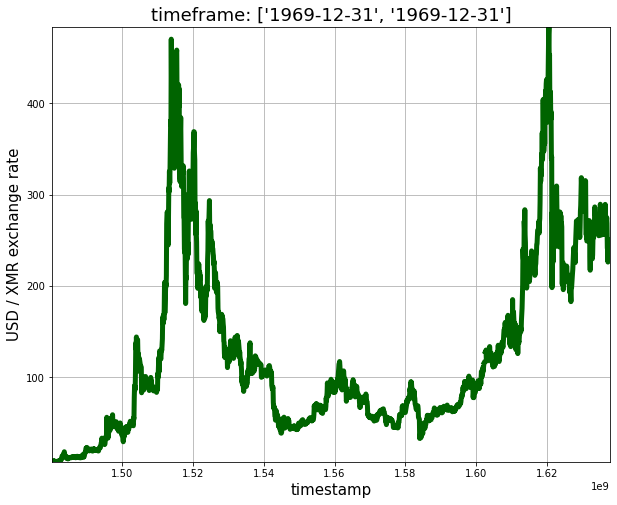

In [4]:
timeseries.plot('Open');
plt.ylabel('USD / XMR exchange rate');
plt.title(f"timeframe: {[isli.human_time(timeseries.data.Open.tolist()[x], formatter='%Y-%m-%d', include_timezone=False) for x in [1, -1]]}", fontsize=18);

### Define a function for sliding window analysis

In [5]:
def appreciation_percent(o: isli.VectorSequence) -> Dict[str, float]:
    """ Simple function that returns % difference between ending value and starting value """
    o.sort()
    return {'% change in value': 100 * (o.values('Open')[-1] / o.values('Open')[0] - 1)}

### Apply function across series

In [6]:
window_widths_weeks: List[float] = [4, 8, 16, 32]
result: isli.SlidingWindowResults = timeseries.sliding_window(appreciation_percent, [x * 60 * 60 * 24 * 7 for x in window_widths_weeks], overlapping=True)

### View the sliding window analysis results

As a timeseries

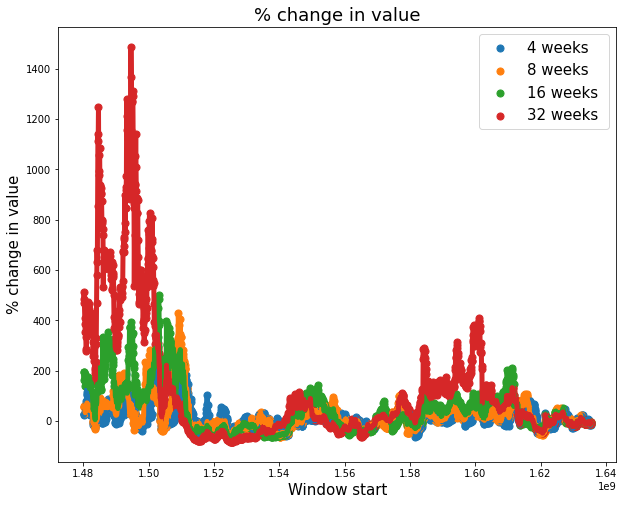

In [7]:
result.plot_results('% change in value', legend_override=[f"{x} weeks " for x in window_widths_weeks]);

As a PDF

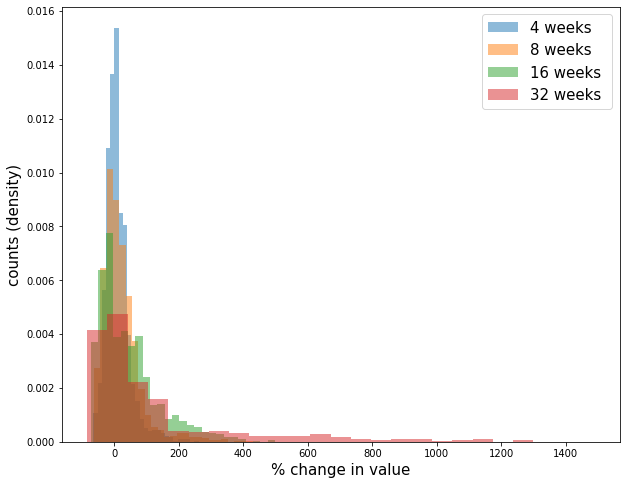

In [8]:
result.plot_pdfs('% change in value', density=True, bins=25, legend_override=[f"{x} weeks " for x in window_widths_weeks]);

As a CDF

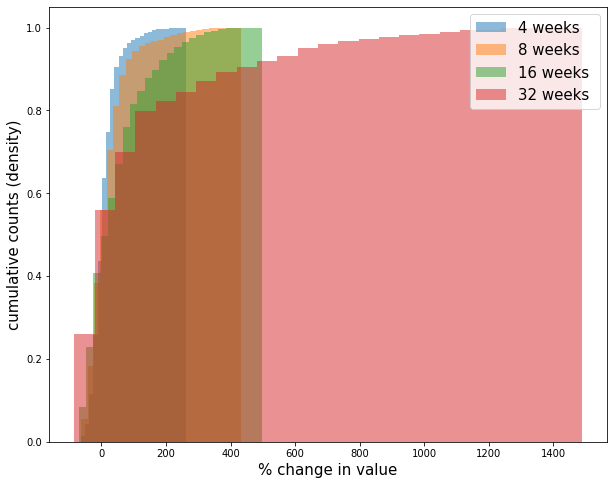

In [9]:
result.plot_pdfs('% change in value', density=True, cumulative=True, bins=25, legend_override=[f"{x} weeks " for x in window_widths_weeks]);